## 3.1 클래스형 컴포넌트
- 컴포넌트를 선언하는 방식은 두가지
    - 함수 컴포넌트
        - 클래스형 컴포넌트보다 선언하기 편하다
        - 메모리 자원도 덜 사용한다
        - 결과물의 파일 크기가 더 작다
        -state와 라이프사이클 API의 사용이 불가능한단점, Hooks 기능이 도입되며 해결
    - 클래스형 컴포넌트
        - render 함수가 꼭 있어야 한다.
        - JSX를 반환해야 한다.

- 클래스형 컴포넌트와 함수 컴포넌트의 차이점
    - 클래스형 컴포넌트의 경우 state 기능 및 라이프 사이클 기능을 사용할 수 있다는 것과 임의 메서드를 정의할 수 있는 점

- 리액트 공식 매뉴엘에서는 컴포넌트를 새로 작성할 때 함수 컴포넌트와 Hooks를 사용하도록 권장

## 3.2 첫 컴포넌트 생성
1. 파일 만들기
2. 코드 작성하기
3. 모듈 내보내기 및 불러오기

#### 3.2.1 src 디렉터리에 MyComponents.js 파일 생성

#### 3.2.2 코드 작성하기
- 함수 컴포넌트로 작성
    ```js
    const MyComponent = () => {
        return <div>나의 새로운 컴포넌트</div>
    }

    export default MyComponent
    ```

#### 3.2.3 모듈 내보내기 및 불러오기
- 내보내기
    - 마지막 줄 export default MyComponent 코드는 다른 파일에서 이 파일을 import 할 때 MyComponent 클래스를 불러오도록 설정

- 불러오기
    ```js
    import MyComponent from './MyComponent';

    const App = () => {
    return <MyComponent />
    };

    export default App;
    ```
    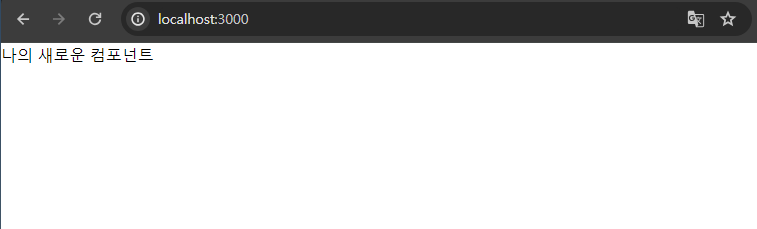


## 3.3 props
- props는 properties를 줄인 표현으로 컴포넌트 속성을 설정할 때 사용하는 요소
- props 값은 해당 컴포넌트를 불러와 사용하는 부모 컴포넌트에서 설정 가능

### 3.3.1 JSX 내부에서 props 렌더링
```js
const MyComponent = props => {
    return <div>안녕하세요, 제 이름은 {props.name}입니다.</div>
}
export default MyComponent
```

### 3.3.2 컴포넌트를 사용할 때 props 값 지정하기
```js
import MyComponent from './MyComponent';

const App = () => {
  return <MyComponent name="React"/>
};

export default App;
```
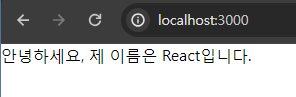

### 3.3.3 props 기본값 설정
- props를 설정 안했을 때를 대비하여 컴포넌트에 기본 값 설정
```js
const MyComponent = props => {
    return <div>안녕하세요, 제 이름은 {props.name}입니다.</div>
}

MyComponent.defaultProps = {
    name:'기본 이름'
}

export default MyComponent
```

### 3.3.4 태그 사이의 내용을 보여주는 children
- 컴포넌트 태그 사이의 내용을 보여주는 children props
```js
import MyComponent from './MyComponent';

const App = () => {
  return <MyComponent>리액트</MyComponent>
};

export default App;
```
```js
const MyComponent = props => {
    return (
    <div>
        안녕하세요, 제 이름은 {props.name}입니다. <br />
        children 값은 {props.children}입니다.
    </div>
    )
}

MyComponent.defaultProps = {
    name:'기본 이름'
}

export default MyComponent
```
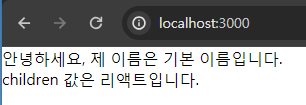

### 3.3.5 비구조화 할당 문법을 통해 props 내부 값 추출하기
- ES6의 비구조화 할당 문법을 사용하여 내부 값을 바로 추출
```js
// const MyComponent = ({name, children}) or
const MyComponent = props => {
    const {name, children} = props
    return (
    <div>
        안녕하세요, 제 이름은 {name}입니다. <br />
        children 값은 {children}입니다.
    </div>
    )
}

MyComponent.defaultProps = {
    name:'기본 이름'
}

export default MyComponent
```

### 3.3.6 propTypes를 통한 props 검증
- 컴포넌트의 필수 props를 지정하거나 props의 타입을 지정할 때는 propTypes를 사용
- 만약 컴포넌트에 설정한 props가 propTyes에서 지정한 형태와 일치하지 않는다면 console에서 경고 메시지를 출력
- isRequired를 사용하면 propTypes를 지정하지 않았을 때 경고 메시지 출력
- https://github.com/facebook/prop-types 에서 다양한 propTypes 종류 확인 가능
- defaultProps와 propTypes는 필수 상항이 아니므로 꼭 사용할 필요가 없지만 협업할때 props가 필요한지 쉽게 알 수 있어 개발 능률이 좋아진다.

```js
import propTypes from 'prop-types'

const MyComponent = ({name, favoriteNumber, children}) => {
    return (
    <div>
        안녕하세요, 제 이름은 {name}입니다. <br />
        children 값은 {children}입니다. <br />
        제가 좋아하는 숫자는 {favoriteNumber}입니다.
    </div>
    )
}

MyComponent.defaultProps = {
    name:'기본 이름'
}

MyComponent.propTypes={
    name:propTypes.string,
    favoriteNumber:propTypes.number.isRequired
}
export default MyComponent
```
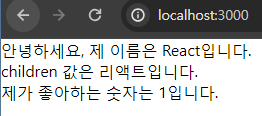

### 3.3.7 클래스형 컴포넌트에서 props 사용하기
```js
import { Component } from 'react';
import PropTypes from 'prop-types';

class MyComponent extends Component {
    static defaultProps = {
        name: '기본 이름'
      };
      static propTypes = {
        name: PropTypes.string,
        favoriteNumber: PropTypes.number.isRequired
      };
    render() {
        const { name, favoriteNumber, children } = this.props; // 비구조화 할당
        return (
        <div>
            안녕하세요, 제 이름은 {name} 입니다. <br />
            children 값은 {children} 입니다. <br />
            제가 좋아하는 숫자는 {favoriteNumber}입니다.
        </div>
        );
    }
}

// MyComponent.defaultProps = {
//   name: '기본 이름'
// };

// MyComponent.propTypes = {
//   name: PropTypes.string,
//   favoriteNumber: PropTypes.number.isRequired
// };

export default MyComponent;
```



## 3.4 state
- 리액트에서 state는 컴포넌트 내부에서 바뀔 수 있는 값을 의미
- 컴포넌트 자신은 해당 props를 읽기 전용으로만 사용할 수 있다
1. 클래스형 컴포넌트가 지니고 있는 state
2. 함수 컴포넌트에서 useState라는 함수를 통해 사용하는 state

### 3.4.1 클래스형 컴포넌트의 state
```js
import { Component } from 'react';

class Counter extends Component {
    constructor(props) {
        super(props);
        // state의 초기값 설정
        this.state = {
            number:0,
            fixedNumber:0
        }
    }
    render() {
        // state 를 조회 할 때에는 this.state 로 조회.
        const { number, fixedNumber } = this.state; 
        return (
        <div>
            <h1>{number}</h1>
            <h2>바뀌지 않는 값:{ fixedNumber }</h2>
            <button
            // onClick 을 통하여 버튼이 클릭됐을 때 호출 할 함수 지정.
            onClick={() => {
                // this.setState를 사용하여 state에 새로운 값을 넣을 수 있다
                this.setState({number:number+1})
            }}
            >
                +1
            </button>
        </div>
        )
    }
}
export default Counter;
```
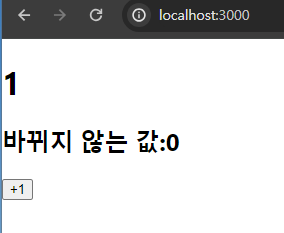

#### 3.4.1.3 this.setState에 객체 대신 함수 인자 전달하기
```js
import { Component } from 'react';

class Counter extends Component {
    state = {
        number : 0,
        fixedNumber: 0
    }
    render() {
        // state 를 조회 할 때에는 this.state 로 조회.
        const { number, fixedNumber } = this.state; 
        return (
        <div>
            <h1>{number}</h1>
            <h2>바뀌지 않는 값:{ fixedNumber }</h2>
            <button
            // onClick 을 통하여 버튼이 클릭됐을 때 호출 할 함수 지정.
            onClick={() => {
                this.setState(prevState => {
                    return {
                        number:prevState.number +1
                    }
                })
                this.setState(prevState => ({
                    number:prevState.number+1
                }))
            }}
            >
                +1
            </button>
        </div>
        )
    }
}
export default Counter;
```

#### 3.4.1.4 this.setState가 끝난 후 특정 작업 실행하기
```js
import { Component } from 'react';

class Counter extends Component {
    state = {
        number : 0,
        fixedNumber: 0
    }
    render() {
        // state 를 조회 할 때에는 this.state 로 조회.
        const { number, fixedNumber } = this.state; 
        return (
        <div>
            <h1>{number}</h1>
            <h2>바뀌지 않는 값:{ fixedNumber }</h2>
            <button
            // onClick 을 통하여 버튼이 클릭됐을 때 호출 할 함수 지정.
            onClick={()=>{
                this.setState(
                    {
                        number:number+1
                    },
                    () => {
                        console.log('방금 setState가 호출되었습니다.')
                        console.log(this.state)
                    }
                )
            }}
            >
                +1
            </button>
        </div>
        )
    }
}
export default Counter;
```

### 3.4.2 함수 컴포넌트에서 useState 사용하기 
- 배열 비구조화 할당
- useState 사용하기
```js
import { useState } from 'react';

const Say = () => {
  const [message, setMessage] = useState('');
  const onClickEnter = () => setMessage('안녕하세요!');
  const onClickLeave = () => setMessage('안녕히 가세요!');

  const [color, setColor] = useState('black');

  return (
    <div>
      <button onClick={onClickEnter}>입장</button>
      <button onClick={onClickLeave}>퇴장</button>
      <h1 style={{ color }}>{message}</h1>
      <button style={{ color: 'red' }} onClick={() => setColor('red')}>
        빨간색
      </button>
      <button style={{ color: 'green' }} onClick={() => setColor('green')}>
        초록색
      </button>
      <button style={{ color: 'blue' }} onClick={() => setColor('blue')}>
        파란색
      </button>
    </div>
  );
};

export default Say;
```
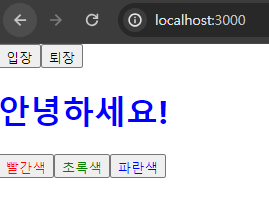


## 3.5 state를 사용할 때 주의 사항
- state 값을 바꾸어야 할 때는 setState 혹은 useState를 통해 전달받은 세터 함수를 사용해야 한다.

## 3.6 정리
- props와 state는 둘 다 컴포넌트에서 사용하거나 렌더링할 데이터를 담고 있으므로 비슷해 보이지만 역할은 매우 다르다.
- props는 부모 컴포넌트가 설정하고, state는 컴포넌트 자체적으로 지닌 값으로 컴포넌트 내부에서 값을 업데이트 가능